In [2]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 109.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 555.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=70603fedfa5761d0a418e5d4a4e9176ffcabf16c17633db78f600b0b3b4649f6
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [3]:
# Import libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [4]:
# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)



In [5]:
# Step 2: Apply gates to demonstrate tensor product states
qc.x(0)  # Apply X gate on qubit 0 → |10>



In [6]:
# Step 3: Measure both qubits
qc.measure([0, 1], [0, 1])



In [7]:
# Step 4: Use AerSimulator (new standard in Qiskit 2.x)
simulator = AerSimulator()

# Transpile the circuit for the simulator
from qiskit import transpile
compiled_circuit = transpile(qc, simulator)

# Run the circuit
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get counts
counts = result.get_counts()



In [8]:
# Step 5: Display circuit and results
print("Measurement Results:", counts)
qc.draw('text')
plt.show()
plot_histogram(counts)
plt.show()

Measurement Results: {'01': 1024}


In [1]:
print("Name: Sriram G\nReg no: 22MIS0270")

Name: Sriram G
Reg no: 22MIS0270


Task 1:Apply a Hadamard gate on both qubits

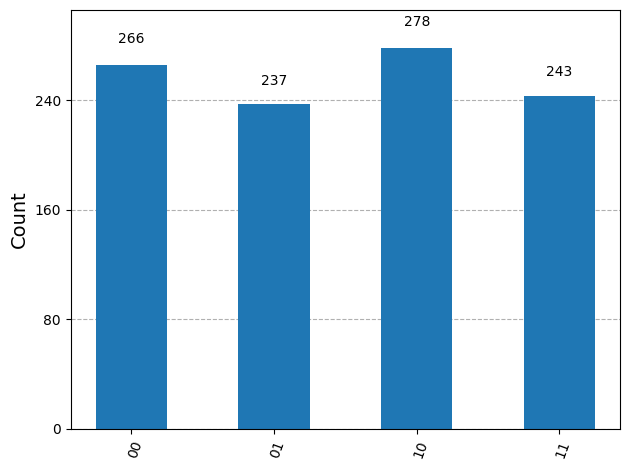

In [9]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2, 2)
qc.h([0, 1])
qc.measure([0, 1], [0, 1])

simulator = AerSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

Task 2: Swap Qubit Roles — apply X gate on the second qubit

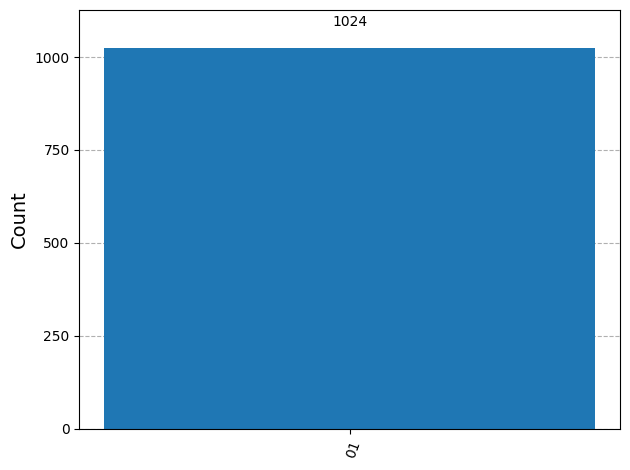

In [10]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Create circuit
qc1 = QuantumCircuit(2, 2)
qc1.x(0)
qc1.measure([0, 1], [0, 1])

# Run with AerSimulator
sim = Aer.get_backend('aer_simulator')
qc1 = sim.run(qc1, shots=1024).result()
counts = qc1.get_counts()
plot_histogram(counts)


Apply X gate on second qubit

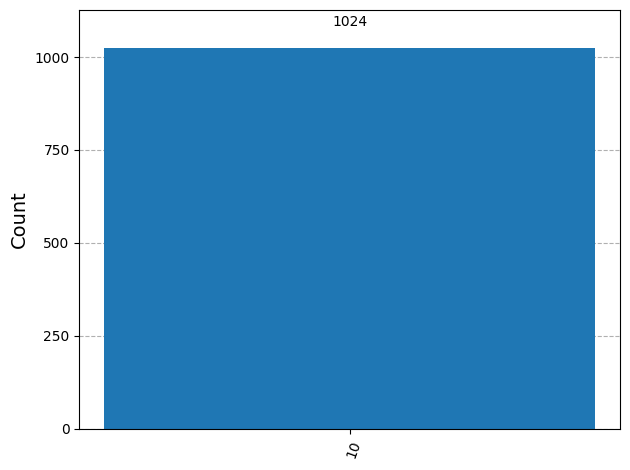

In [11]:
qc2 = QuantumCircuit(2, 2)
qc2.x(1)
qc2.measure([0, 1], [0, 1])

simulator = AerSimulator()
result2 = simulator.run(qc2, shots=1024).result()
counts2 = result2.get_counts()
plot_histogram(counts2)

Task 3: Add a CNOT Gate

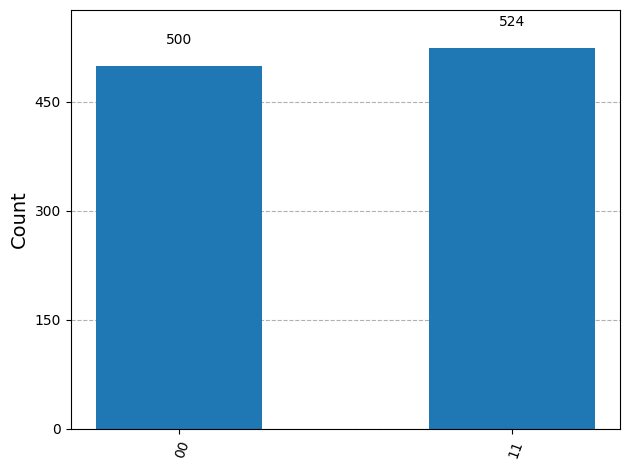

In [12]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
result = sim.run(qc, shots=1024).result()

counts = result.get_counts()
plot_histogram(counts)

Task 4: Increase Measurement Shots

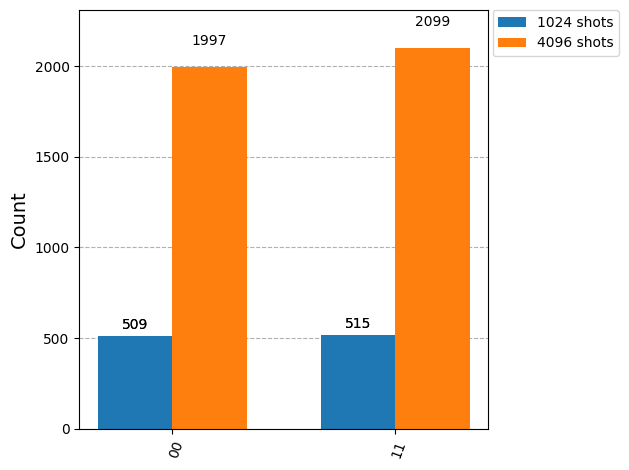

In [13]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

sim = Aer.get_backend('aer_simulator')

result_1024 = sim.run(qc, shots=1024).result()
result_4096 = sim.run(qc, shots=4096).result()

counts_1024 = result_1024.get_counts()
counts_4096 = result_4096.get_counts()

plot_histogram([counts_1024, counts_4096], legend=['1024 shots', '4096 shots'])

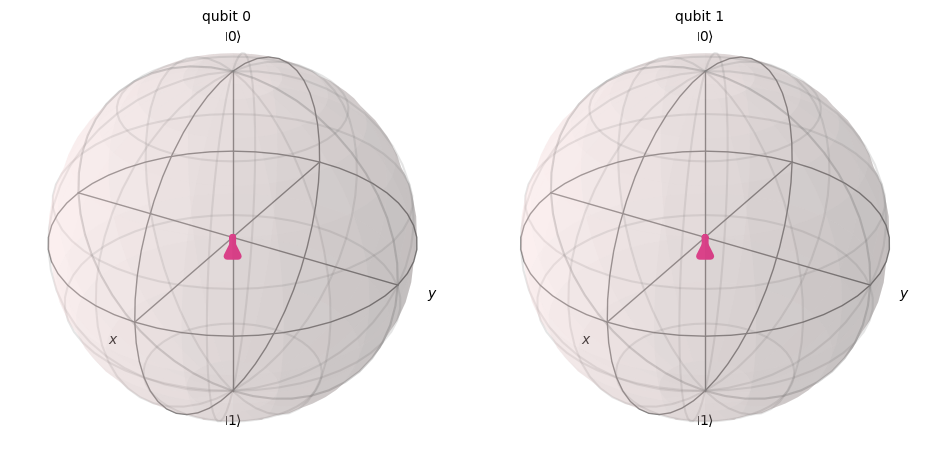

In [14]:
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
result = sim.run(qc).result()
state = result.get_statevector()

plot_bloch_multivector(state)

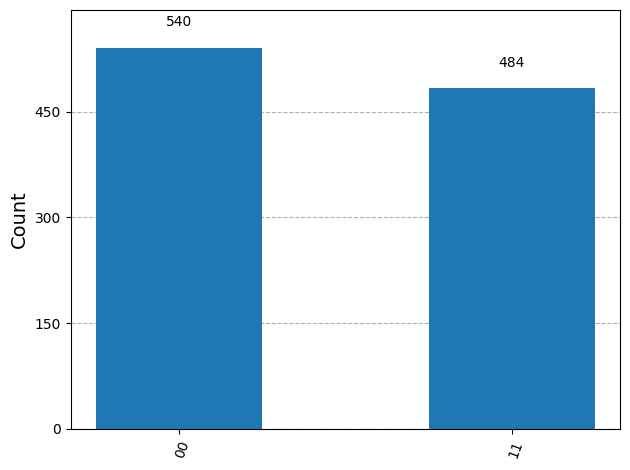

In [15]:
qc.measure_all()

result2 = sim.run(qc, shots=1024).result()
counts = result2.get_counts()

plot_histogram(counts)